In [1]:
import random
from datetime import datetime
from simulation import Simulation

random.seed(datetime.now().timestamp())

# Spustenie simulácie
sim = Simulation(sample_arrival_mean=5, end_time=360, num_doctors=4)
results = sim.run()
lab = sim.lab

In [2]:
print("\n=== ŠTATISTIKY HISTOPATOLOGICKÉHO PRACOVISKA ===")
print(f"Spracovaných vzoriek: {results['processed_samples']}")
print(f"Nespracovaných vzoriek: {results['remaining_samples']}")
print(f"Celkový počet spracovaných + nespracovaných vzoriek: {results['total_samples']}")


=== ŠTATISTIKY HISTOPATOLOGICKÉHO PRACOVISKA ===
Spracovaných vzoriek: 66
Nespracovaných vzoriek: 0
Celkový počet spracovaných + nespracovaných vzoriek: 66


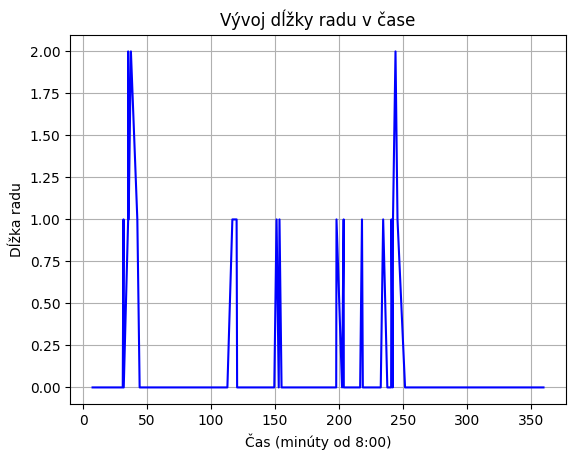


=== Doba čakania na posúdenie ===
Priemerná doba čakania: 2.39 minút


In [3]:
import matplotlib.pyplot as plt

plt.plot(lab.queue_times, lab.queue_lengths, color='blue')
plt.xlabel("Čas (minúty od 8:00)")
plt.ylabel("Dĺžka radu")
plt.title("Vývoj dĺžky radu v čase")
plt.grid(True)
plt.show()

print("\n=== Doba čakania na posúdenie ===")
if hasattr(lab, 'waiting_times') and lab.waiting_times:
    avg_wait = sum(lab.waiting_times) / len(lab.waiting_times)
    print(f"Priemerná doba čakania: {avg_wait:.2f} minút")
else:
    print("Žiadne vzorky nečakali v rade.")

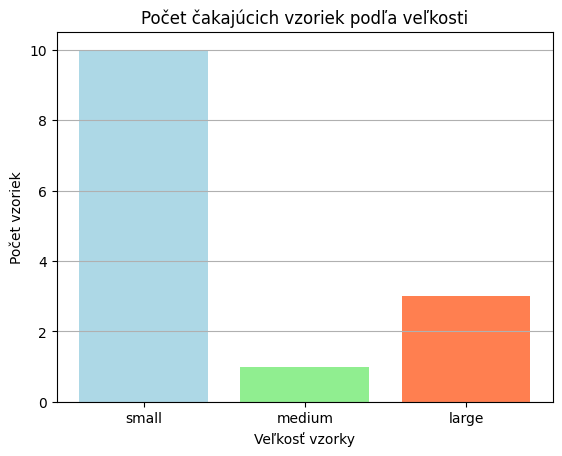


=== Počet čakajúcich vzoriek na posúdenie podľa typu ===
Small: 10 vzoriek
Medium: 1 vzoriek
Large: 3 vzoriek


In [4]:
from collections import Counter

waiting_sizes = [s.size.value for s in lab.waiting_samples]
count_by_size = Counter(waiting_sizes)

labels = ['small', 'medium', 'large']
counts = [count_by_size.get(label, 0) for label in labels]

plt.bar(labels, counts, color=['lightblue', 'lightgreen', 'coral'])
plt.title("Počet čakajúcich vzoriek podľa veľkosti")
plt.xlabel("Veľkosť vzorky")
plt.ylabel("Počet vzoriek")
plt.grid(axis='y')
plt.show()

print("\n=== Počet čakajúcich vzoriek na posúdenie podľa typu ===")
for label in labels:
    print(f"{label.capitalize()}: {count_by_size.get(label, 0)} vzoriek")



=== Počty jednotlivých vzoriek ===
small: 43 (65.15%)
large: 9 (13.64%)
medium: 14 (21.21%)


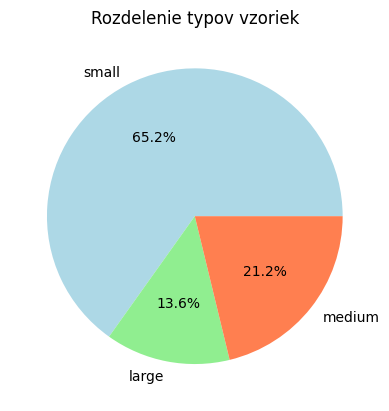

In [5]:
from collections import Counter

print("\n=== Počty jednotlivých vzoriek ===")
sizes = [s.size.value for s in lab.processed_samples]
counter = Counter(sizes)

total = sum(counter.values())
for size, count in counter.items():
    percentage = (count / total) * 100
    print(f"{size}: {count} ({percentage:.2f}%)")
    
plt.pie(counter.values(), labels=counter.keys(), autopct="%1.1f%%", colors=['lightblue', 'lightgreen', 'coral'])
plt.title("Rozdelenie typov vzoriek")
plt.show()

In [6]:
print("\n=== Vzorky vyžadujúce primára ===")

head_doctor_samples = sum(1 for sample in lab.processed_samples if sample.needs_head_doctor_review)

if lab.processed_samples:
    hd_percentage = (head_doctor_samples/len(lab.processed_samples)) * 100
    print(f"Celkový počet vzoriek: {head_doctor_samples} ({hd_percentage:.2f}%)")


=== Vzorky vyžadujúce primára ===
Celkový počet vzoriek: 3 (4.55%)



=== Vyťaženosť jednotlivých lekárov ===
[0, 0, 0, 0, 0]
Lekár 1: 76.60% vyťaženosť
Lekár 2: 73.05% vyťaženosť
Lekár 3: 58.16% vyťaženosť
Lekár 4: 37.59% vyťaženosť
Primár: 5.67% vyťaženosť


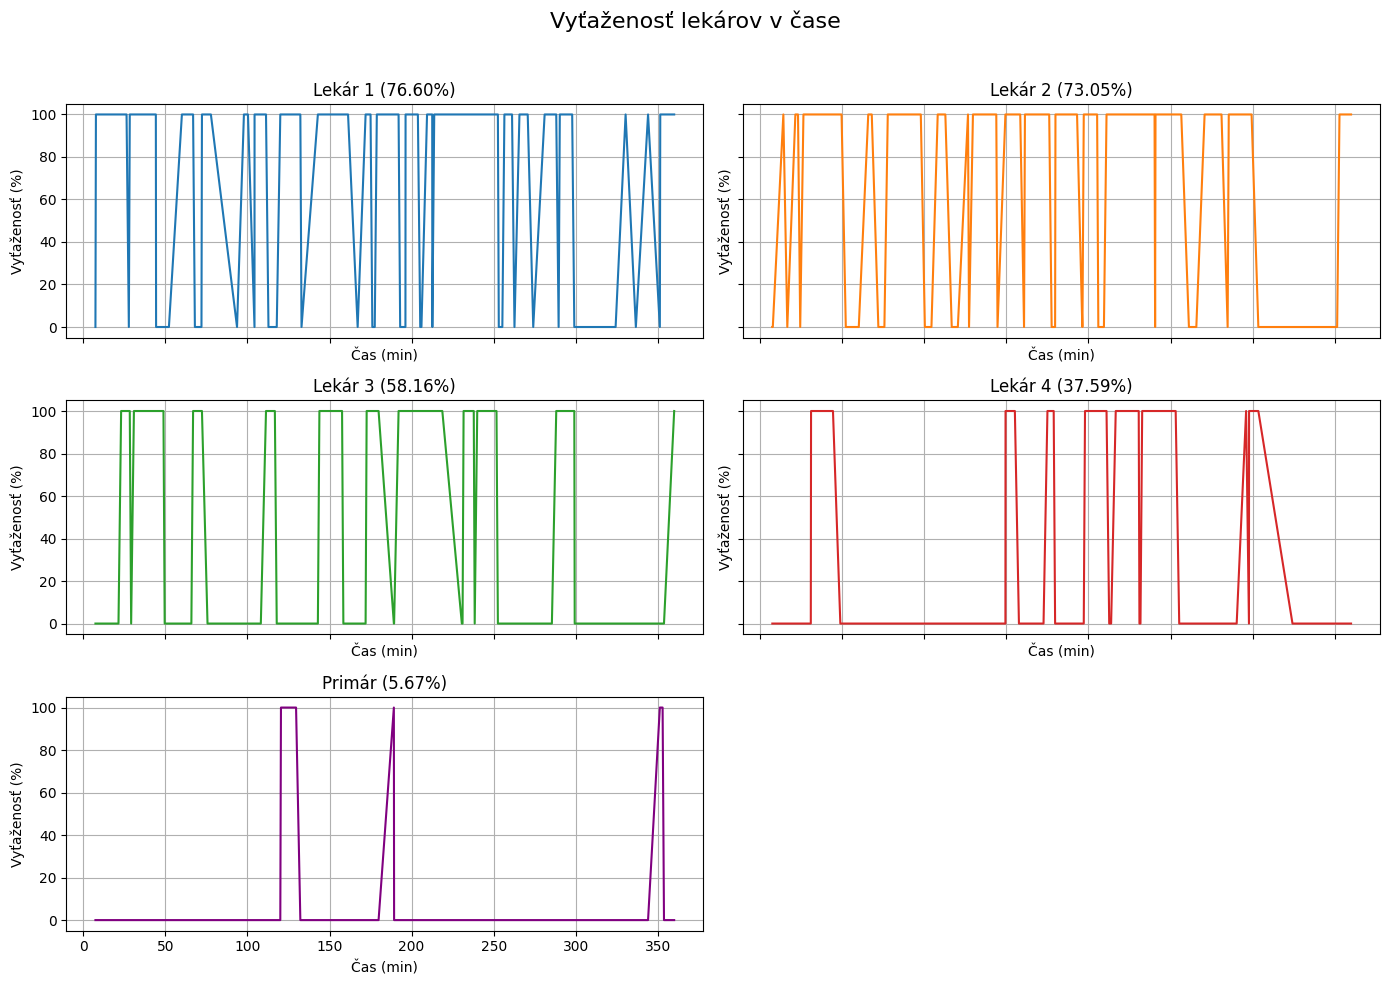

In [7]:
import matplotlib.pyplot as plt

print("\n=== Vyťaženosť jednotlivých lekárov ===")
num_doctors_total = len(lab.doctor_utilization[0])
total_time_points = len(lab.doctor_utilization)

average_utilization_per_doctor = []
for doc_id in range(num_doctors_total):
    busy_count = sum(util[doc_id] for util in lab.doctor_utilization)
    utilization_percent = (busy_count / total_time_points) * 100
    average_utilization_per_doctor.append(utilization_percent)
    if doc_id < num_doctors_total - 1:
        print(f"Lekár {doc_id + 1}: {utilization_percent:.2f}% vyťaženosť")
    else:
        print(f"Primár: {utilization_percent:.2f}% vyťaženosť")

# Farby pre 5 lekárov vrátane primára
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'purple']
labels = [f"Lekár {i + 1}" for i in range(num_doctors_total - 1)] + ["Primár"]

# 5 grafov – 3x2 matica (posledný graf vľavo dole, pravý dolný prázdny)
fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for doc_id in range(num_doctors_total):
    usage = [util[doc_id] * 100 for util in lab.doctor_utilization]
    axs[doc_id].plot(lab.utilization_times, usage, color=colors[doc_id])
    axs[doc_id].set_title(f"{labels[doc_id]} ({average_utilization_per_doctor[doc_id]:.2f}%)")
    axs[doc_id].set_xlabel("Čas (min)")
    axs[doc_id].set_ylabel("Vyťaženosť (%)")
    axs[doc_id].grid(True)

# Odstrániť prázdny subplot (posledný pravý dolný, ak nie je potrebný)
if len(axs) > num_doctors_total:
    fig.delaxes(axs[-1])

plt.suptitle("Vyťaženosť lekárov v čase", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()